In [1]:
from lxml import etree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Data from:
https://archive.org/details/stackexchange

In [2]:
update_from_web = False

In [3]:
def get_rank(s):
    # Read dataset
    root = etree.parse('Users-%s.xml'%s)
    Reputation = []
    for x in root.getiterator(tag='row'):
        Reputation.append(float(x.get('Reputation')))
    # Frequency Analysis by Ranking of Data
    # Sort in descending order
    a = np.array(Reputation)
    a.sort()
    a = a[::-1]
    # Rank
    rank = np.arange(1,len(a)+1)
    return rank, a

def plot(rank, rep, site):
    fig, ax = plt.subplots()
    fig.set_size_inches(8, 8)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('log rank')
    ax.set_ylabel('log reputation')
    ax.plot(rank, rep, '-.b')
    ax.title.set_text('Reputation distribution on %s'%site)
    plt.show()

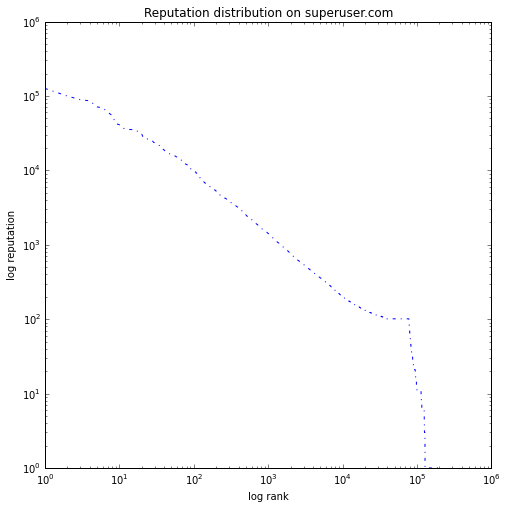

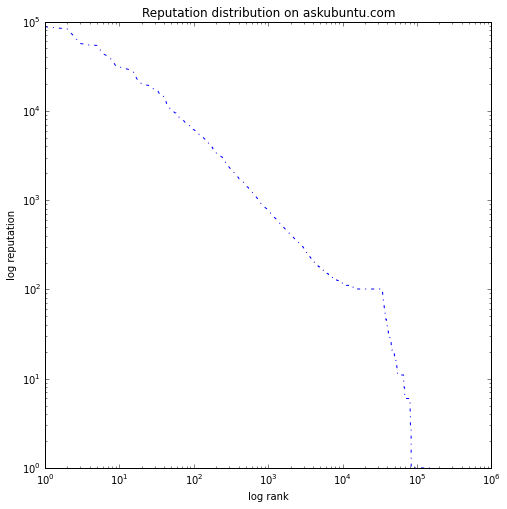

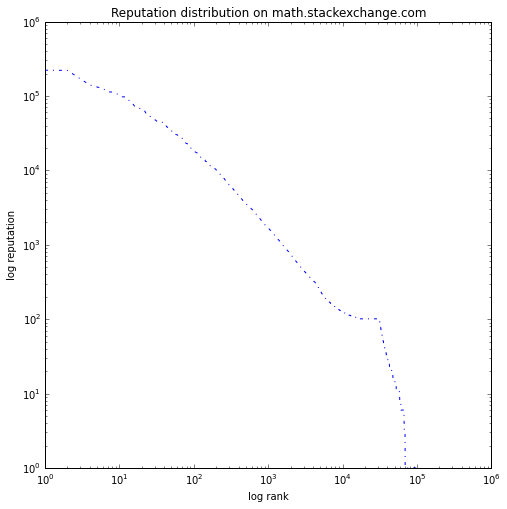

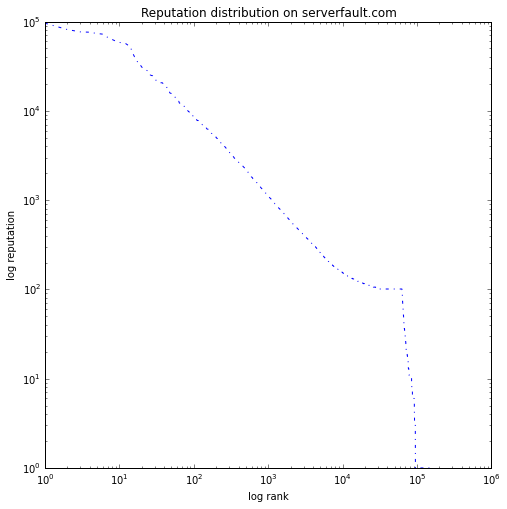

In [4]:
sites = ['superuser.com','askubuntu.com','math.stackexchange.com', 'serverfault.com']
for site in sites:
    rank, rep = get_rank(site)
    plot(rank, rep, site)